In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm

# Практика

In [4]:
def generate_uniform(N, a, b):
    return np.random.uniform(a,b,N)

def generate_cauchy(N):
    return np.random.standard_cauchy(N)

In [5]:
def get_expected_value(values):
    return values.sum() / len(values)

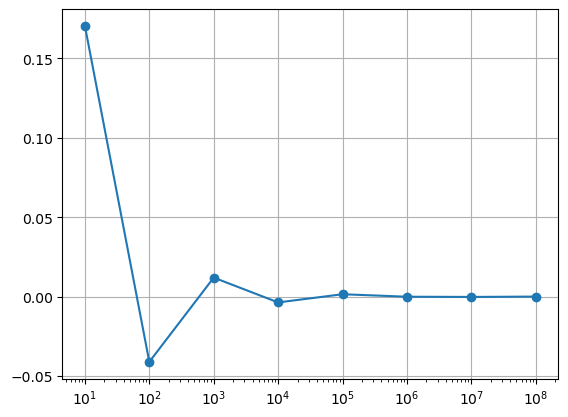

In [29]:
# Uniform
n_values = [10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
expectation_values = []
for N in n_values:
    expectation_values.append(get_expected_value(generate_uniform(int(N), -1, 1)))

plt.plot(n_values, expectation_values, marker='o', linestyle='-')
plt.xscale('log')
plt.grid(True) 
plt.show()

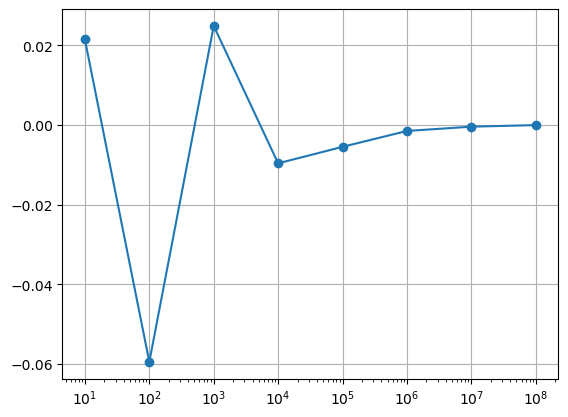

In [28]:
# Normal
n_values = [10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
expectation_values = []
for N in n_values:
    expectation_values.append(get_expected_value(np.random.normal(0, 1, int(N))))

plt.plot(n_values, expectation_values, marker='o', linestyle='-')
plt.xscale('log')
plt.grid(True) 
plt.show()

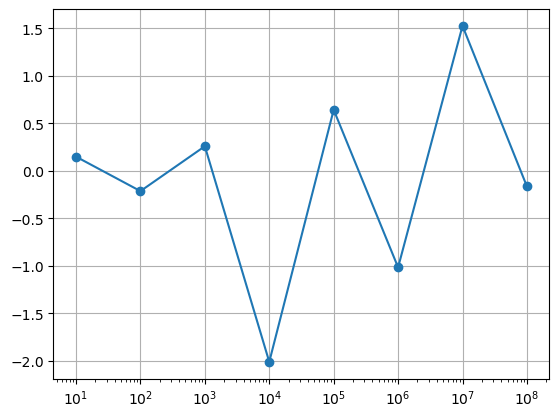

In [30]:
# Cauchy
n_values = [10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
expectation_values = []
for N in n_values:
    expectation_values.append(get_expected_value(generate_cauchy(int(N))))

plt.plot(n_values, expectation_values, marker='o', linestyle='-')
plt.xscale('log')
plt.grid(True) 
plt.show()

In [48]:
# Uniform
N = 10
n_values = []
real_p = []
mean = 0
std_dev = np.sqrt(1/3)
z_critical = stats.norm.ppf(0.975) # Z-критерий для 95% доверительного интервала - это 0.975

for i in tqdm(range(7)):
    standard_error = std_dev / np.sqrt(N)
    count_exp_in_interval = []
    for j in range(10000):
        data = generate_uniform(int(N), -1, 1)
        
        mean_cur = np.mean(data)
        
        l, r = (mean_cur - z_critical * standard_error, mean_cur + z_critical * standard_error)
    
        if l <= mean and mean <= r:
            count_exp_in_interval.append(1)
        else:
            count_exp_in_interval.append(0)
    n_values.append(N)
    real_p.append(np.mean(count_exp_in_interval))
    if i % 2 == 0:
        N *= 5
    else:
        N *= 2

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.53it/s]


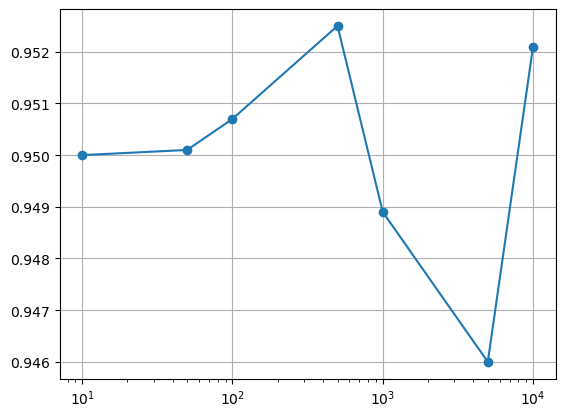

In [50]:
plt.plot(n_values, real_p, marker='o')
plt.xscale('log')
plt.grid(True) 
plt.show()

In [51]:
# Normal
N = 10
n_values = []
real_p = []
mean = 0
std_dev = 1
z_critical = stats.norm.ppf(0.975) # Z-критерий для 95% доверительного интервала - это 0.975

for i in tqdm(range(7)):
    count_exp_in_interval = []
    standard_error = std_dev / np.sqrt(N)
    for j in range(10000):
        data = np.random.normal(mean, std_dev, int(N))
        mean_cur = np.mean(data)
        l, r = (mean_cur - z_critical * standard_error, mean_cur + z_critical * standard_error)
        
        if l <= mean and mean <= r:
            count_exp_in_interval.append(1)
        else:
            count_exp_in_interval.append(0)
    n_values.append(N)
    real_p.append(np.mean(count_exp_in_interval))
    if i % 2 == 0:
        N *= 5
    else:
        N *= 2

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


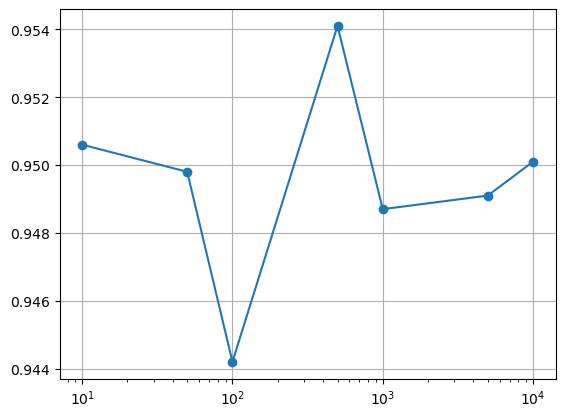

In [52]:
plt.plot(n_values, real_p, marker='o')
plt.xscale('log')
plt.grid(True) 
plt.show()

# ДЗ

## jackknife

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 50.36it/s]


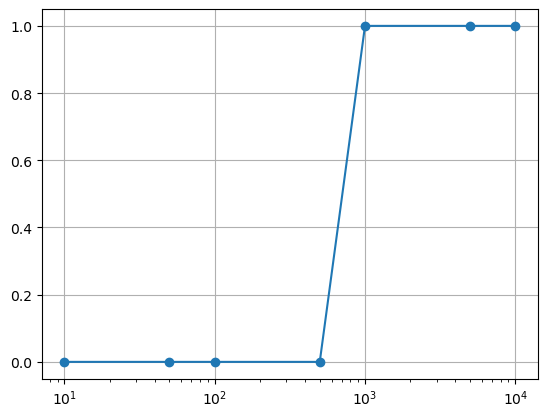

In [53]:
# Normal
N = 10
n_values = []
real_p = []
mean = 0
std_dev = 1
z_critical = stats.norm.ppf(0.975) # Z-критерий для 95% доверительного интервала - это 0.975

for i in tqdm(range(7)):
    count_exp_in_interval = []
    data_original = np.random.normal(mean, std_dev, int(N))
    for j in range(N):
        data = data_original
        data = np.delete(data, j)
        
        mean_cur = np.mean(data)
        
        l, r = (mean_cur - z_critical * standard_error, mean_cur + z_critical * standard_error)
    
        if l <= mean and mean <= r:
            count_exp_in_interval.append(1)
        else:
            count_exp_in_interval.append(0)
    n_values.append(N)
    real_p.append(np.mean(count_exp_in_interval))
    if i % 2 == 0:
        N *= 5
    else:
        N *= 2

plt.plot(n_values, real_p, marker='o')
plt.xscale('log')
plt.grid(True) 
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 48.46it/s]


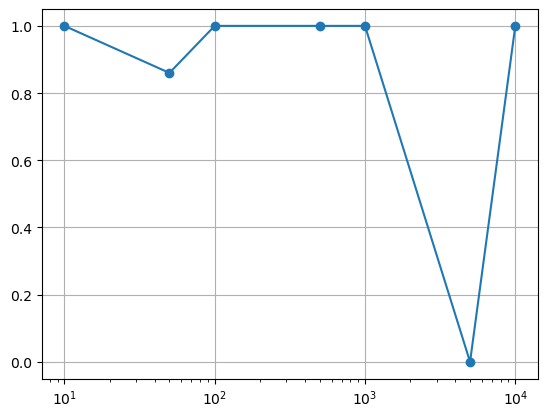

In [54]:
# Uniform
N = 10
n_values = []
real_p = []
mean = 0
std_dev = np.sqrt(1/3)
z_critical = stats.norm.ppf(0.975) # Z-критерий для 95% доверительного интервала - это 0.975

for i in tqdm(range(7)):
    standard_error = std_dev / np.sqrt(N)
    count_exp_in_interval = []
    data_original = generate_uniform(int(N), -1, 1)
    for j in range(N):
        data = data_original
        data = np.delete(data, j)
        
        mean_cur = np.mean(data)
        
        l, r = (mean_cur - z_critical * standard_error, mean_cur + z_critical * standard_error)
    
        if l <= mean and mean <= r:
            count_exp_in_interval.append(1)
        else:
            count_exp_in_interval.append(0)
    n_values.append(N)
    real_p.append(np.mean(count_exp_in_interval))
    if i % 2 == 0:
        N *= 5
    else:
        N *= 2

plt.plot(n_values, real_p, marker='o')
plt.xscale('log')
plt.grid(True) 
plt.show()

## bootstrap

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.20it/s]


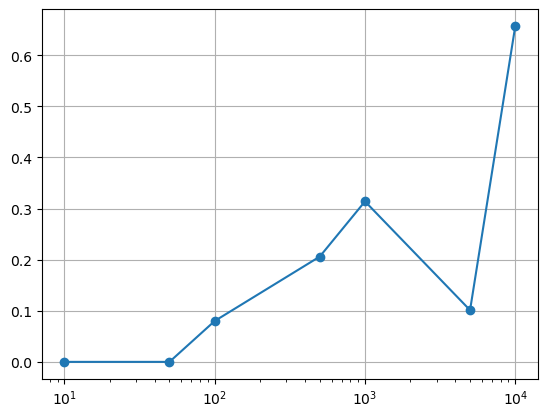

In [55]:
# Normal
N = 10
n_values = []
real_p = []
mean = 0
std_dev = 1
z_critical = stats.norm.ppf(0.975) # Z-критерий для 95% доверительного интервала - это 0.975

for i in tqdm(range(7)):
    count_exp_in_interval = []
    data_original = np.random.normal(mean, std_dev, int(N))
    for j in range(N):
        data = np.random.choice(data_original, int(N), replace=True)

        mean_cur = np.mean(data)
        
        l, r = (mean_cur - z_critical * standard_error, mean_cur + z_critical * standard_error)
    
        if l <= mean and mean <= r:
            count_exp_in_interval.append(1)
        else:
            count_exp_in_interval.append(0)
    n_values.append(N)
    real_p.append(np.mean(count_exp_in_interval))
    if i % 2 == 0:
        N *= 5
    else:
        N *= 2

plt.plot(n_values, real_p, marker='o')
plt.xscale('log')
plt.grid(True) 
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.31it/s]


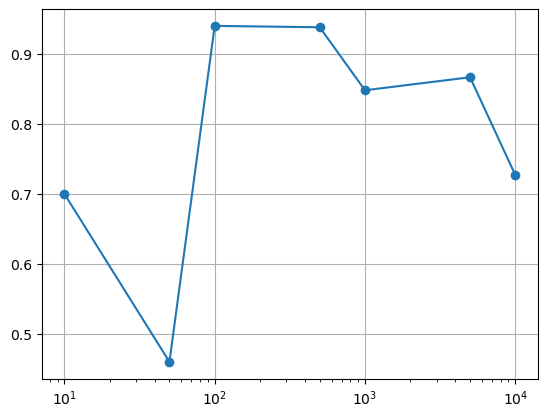

In [56]:
# Uniform
N = 10
n_values = []
real_p = []
mean = 0
std_dev = np.sqrt(1/3)
z_critical = stats.norm.ppf(0.975) # Z-критерий для 95% доверительного интервала - это 0.975

for i in tqdm(range(7)):
    standard_error = std_dev / np.sqrt(N)
    count_exp_in_interval = []
    data_original = generate_uniform(int(N), -1, 1)
    for j in range(N):
        data = np.random.choice(data_original, int(N), replace=True)
        
        mean_cur = np.mean(data)
        
        l, r = (mean_cur - z_critical * standard_error, mean_cur + z_critical * standard_error)
    
        if l <= mean and mean <= r:
            count_exp_in_interval.append(1)
        else:
            count_exp_in_interval.append(0)
    n_values.append(N)
    real_p.append(np.mean(count_exp_in_interval))
    if i % 2 == 0:
        N *= 5
    else:
        N *= 2

plt.plot(n_values, real_p, marker='o')
plt.xscale('log')
plt.grid(True) 
plt.show()